# **Estadística Inferencial**

La estadística inferencial es una rama de la estadística que se encarga de hacer inferencias sobre las características de una población a partir de muestras.

# 1. Conceptos Básicos de Estadística Inferencial

**Población:** Se refiere al conjunto completo de elementos o resultados que se están estudiando.
Por ejemplo, si queremos analizar la estatura promedio de todos los estudiantes de una universidad, la población sería todos los estudiantes de esa universidad.

**Muestra:** Es un subconjunto de la población que se selecciona para la observación y análisis.
Continuando con el ejemplo anterior, si no podemos medir la estatura de todos los estudiantes, podríamos seleccionar un grupo representativo de 100 estudiantes como nuestra muestra.

**Parámetro:** Un parámetro es una medida numérica que describe una característica de la población.
En el caso de nuestro ejemplo, la estatura promedio de todos los estudiantes de la universidad sería un parámetro.

**Estadístico:** Es una medida numérica calculada a partir de los datos de la muestra.
Si calculamos la estatura promedio de nuestra muestra de 100 estudiantes, este promedio sería nuestro estadístico.

**Muestreo:** El proceso de seleccionar una muestra de la población. Es crucial que este proceso sea aleatorio para asegurar que la muestra sea representativa de la población.

**Error de muestreo:** La diferencia entre un parámetro poblacional y el estadístico calculado a partir de una muestra. Este error surge debido a que la muestra puede no representar perfectamente a toda la población.

Distinguir entre estadística descriptiva e inferencial es fundamental. Mientras que la estadística descriptiva se enfoca en describir y resumir los datos de una muestra o población a través de medidas como la media, mediana, modo y desviación estándar, la estadística inferencial va más allá, utilizando los datos de una muestra para hacer generalizaciones sobre una población. Esto incluye estimar parámetros poblacionales, realizar pruebas de hipótesis, y más.

Una parte crucial de la estadística inferencial es el muestreo aleatorio. La validez de las inferencias hechas sobre una población depende en gran medida de la representatividad de la muestra. El muestreo aleatorio asegura que cada miembro de la población tenga la misma probabilidad de ser seleccionado para la muestra, minimizando el sesgo y permitiendo que los resultados sean generalizables a toda la población.

In [ ]:
import numpy as np
from scipy import stats

# Paso 1: Generar datos de muestra aleatorios
np.random.seed(1000) # Para reproducibilidad
tamaño_muestra = 100
media_poblacional_real = 170
desviacion_estandar_poblacional = 10
muestra = np.random.normal(media_poblacional_real, desviacion_estandar_poblacional, tamaño_muestra)

# Paso 2: Estimación de la media de la muestra
media_muestra = np.mean(muestra)

(media_muestra)

170.56939605669976

# 2. Distribuciones de Probabilidad


Las distribuciones de probabilidad son fundamentales en la estadística inferencial, ya que nos permiten modelar diferentes tipos de datos y situaciones. Entre las más comunes y útiles se encuentran la distribución normal, la t-Student, la chi-cuadrado, y la F, cada una con sus propios usos y características en el contexto de la inferencia estadística.

**Distribución Normal:** Conocida también como distribución gaussiana, es quizás la más importante y ampliamente utilizada debido a su propiedad fundamental descrita en el Teorema del Límite Central. Este teorema establece que, bajo ciertas condiciones, la suma (o promedio) de un gran número de variables aleatorias independientes y distribuidas idénticamente tiende a seguir una distribución normal, independientemente de la distribución original de las variables. Esto hace que la distribución normal sea central en la estadística inferencial, pues muchas técnicas asumen que los datos se distribuyen de esta manera, especialmente cuando el tamaño de la muestra es grande.

**Distribución t-Student:** Esta distribución es particularmente útil cuando se trabaja con muestras pequeñas y la desviación estándar de la población es desconocida. La t-Student ayuda a ajustar la incertidumbre adicional en la estimación del error estándar y se utiliza ampliamente en pruebas de hipótesis y en la construcción de intervalos de confianza cuando el tamaño de la muestra es reducido.

**Distribución Chi-cuadrado (χ²):** Se aplica principalmente en pruebas de bondad de ajuste, pruebas de independencia en tablas de contingencia y en la estimación de varianzas. Una característica clave de la distribución chi-cuadrado es que se utiliza para analizar variables aleatorias que deben ser siempre positivas, ya que se basa en sumas de cuadrados de variables aleatorias normales estandarizadas.

**Distribución F:** Se utiliza en el análisis de varianza (ANOVA), para comparar las varianzas de dos poblaciones y en el análisis de regresión. La distribución F es clave para determinar si las diferencias entre las medias de diferentes grupos son estadísticamente significativas, permitiendo a los investigadores evaluar la varianza entre grupos frente a la varianza dentro de los grupos.

In [ ]:
import numpy as np
from scipy import stats

# 1. Distribución Normal: Generación de datos
datos_normales = np.random.normal(loc=0, scale=1, size=1000)  # media=0, desviación estándar=1

# 2. Distribución t-Student: Intervalo de confianza para la media de una muestra pequeña
muestra_pequeña = np.random.choice(datos_normales, size=30)  # Tomamos una muestra de 30 elementos
confianza = 0.95
grados_libertad = len(muestra_pequeña)-1
media_muestra = np.mean(muestra_pequeña)
sem = stats.sem(muestra_pequeña)  # Error estándar de la media
intervalo_confianza = stats.t.interval(confianza, grados_libertad, media_muestra, sem)

# 3. Distribución Chi-cuadrado: Prueba de bondad de ajuste
# Supongamos que queremos comprobar si nuestra 'datos_normales' sigue una distribución normal
# Para simplificar, usaremos la prueba de kurtosis, que es una parte de lo que podría implicar una prueba de bondad de ajuste
kurtosis_test = stats.kurtosistest(datos_normales)

# 4. Distribución F: ANOVA simplificado para comparar varianzas
# Generamos dos grupos de datos para comparar sus varianzas
datos_grupo1 = np.random.normal(loc=0, scale=1, size=30)
datos_grupo2 = np.random.normal(loc=0, scale=1.5, size=30)
#anova_resultado = stats.f_oneway(datos_grupo1, datos_grupo2)

(intervalo_confianza, kurtosis_test) #anova_resultado


((-0.4289398320496087, 0.22870232272662294),
 KurtosistestResult(statistic=-1.5885564231571003, pvalue=0.11216057301378543))

# 3. Estimación de Parámetros

La estimación de parámetros poblacionales es un proceso crucial en estadística inferencial que nos permite hacer generalizaciones sobre una población entera a partir del análisis de una muestra de dicha población. Los parámetros poblacionales, como la media y la varianza, son valores que resumen características de la totalidad de la población. Dado que no siempre es práctico o posible estudiar cada miembro de una población, utilizamos muestras y a partir de ellas calculamos estadísticos muestrales, como la media y la varianza de la muestra, para estimar dichos parámetros.

Existen dos tipos principales de estimaciones: puntuales e intervalares. Una estimación puntual proporciona un único valor como estimación del parámetro poblacional. Por ejemplo, si queremos estimar la altura media de todos los estudiantes de una universidad, podríamos tomar una muestra de estudiantes, calcular la media de la altura de esos estudiantes (estadístico muestral), y usar ese valor como nuestra estimación puntual de la altura media de la población de todos los estudiantes.

Sin embargo, las estimaciones puntuales tienen una limitación importante: no nos dicen nada sobre la precisión o la incertidumbre asociada con la estimación. Aquí es donde entran en juego las estimaciones por intervalo, que proporcionan un rango de valores dentro del cual esperamos que se encuentre el parámetro poblacional. Este rango se conoce como intervalo de confianza.

El intervalo de confianza es una herramienta poderosa en estadística inferencial porque no solo ofrece una estimación del parámetro poblacional, sino que también indica un nivel de confianza en esa estimación. Por ejemplo, un intervalo de confianza del 95% para la altura media de los estudiantes significa que, si repitiéramos el proceso de muestreo muchas veces, esperaríamos que el parámetro poblacional real (la altura media de todos los estudiantes) estuviera dentro de ese intervalo en el 95% de los casos.

La importancia del intervalo de confianza radica en su capacidad para expresar la precisión de una estimación. Un intervalo más estrecho indica una mayor precisión y un alto nivel de confianza en que el parámetro poblacional se encuentra dentro de ese intervalo. Por el contrario, un intervalo más amplio sugiere mayor incertidumbre sobre la ubicación exacta del parámetro. La selección del nivel de confianza (como 95% o 99%) y el cálculo del intervalo de confianza dependen del tamaño de la muestra y de la variabilidad de los datos en la muestra.

In [ ]:
# Importamos las librerías necesarias
import numpy as np

#Importando Scipy
from scipy import stats

# Generamos una muestra aleatoria para el ejemplo
# Supongamos que esta muestra representa las alturas (en cm) de un grupo de estudiantes
np.random.seed(42)  # Para garantizar reproducibilidad
muestra_alturas = np.random.normal(170, 10, 100)  # media = 170 cm, desviación estándar = 10 cm, n = 100

# Estimación puntual de la media y la varianza de la muestra
media_muestra = np.mean(muestra_alturas)
varianza_muestra = np.var(muestra_alturas, ddof=1)  # ddof=1 para la varianza muestral

# Estimación por intervalo (Intervalo de confianza) para la media
# Usamos un intervalo de confianza del 95%
confianza = 0.95
sem = stats.sem(muestra_alturas)  # Error estándar de la media
intervalo_confianza = stats.t.interval(confianza, len(muestra_alturas)-1, media_muestra, sem)

(media_muestra, varianza_muestra, intervalo_confianza)

(168.96153482605902,
 82.47698936301602,
 (167.15953163638096, 170.76353801573708))

4. Pruebas de Hipótesis
Resumen: Se introducen los conceptos de hipótesis nula y alternativa, y se explica cómo realizar pruebas de hipótesis para evaluar afirmaciones sobre parámetros poblacionales. Se discuten los errores tipo I y tipo II, el valor p y el nivel de significancia.

Las pruebas de hipótesis son un pilar fundamental de la estadística inferencial, proporcionando un marco formal para tomar decisiones y evaluar afirmaciones sobre parámetros poblacionales basados en datos de muestra. Este proceso comienza con la formulación de dos hipótesis opuestas: la hipótesis nula (H0) y la hipótesis alternativa (H1 o Ha).

Hipótesis Nula (H0): Es una declaración de "no efecto" o "no diferencia" que indica que el parámetro poblacional es igual a un valor especificado. La hipótesis nula es lo que se pone a prueba en un análisis estadístico, y el objetivo es determinar si hay suficiente evidencia en los datos de la muestra para rechazarla.

Hipótesis Alternativa (H1 o Ha): Contrasta directamente con la hipótesis nula y representa una afirmación de que hay un efecto, una diferencia o una relación. La hipótesis alternativa se acepta si los datos de la muestra proporcionan suficiente evidencia para rechazar la hipótesis nula.

Errores Tipo I y Tipo II:

Error Tipo I (α): Ocurre cuando la hipótesis nula es rechazada incorrectamente, aunque en realidad es verdadera. El nivel de significancia (α), comúnmente fijado en 0.05, indica la probabilidad de cometer un error de Tipo I.
Error Tipo II (β): Se da cuando la hipótesis nula no es rechazada, a pesar de que la hipótesis alternativa es verdadera. La potencia de una prueba (1 - β) mide la capacidad de la prueba para detectar un efecto real cuando existe.
Valor P: Es la probabilidad de observar los resultados de la muestra, o algo más extremo, asumiendo que la hipótesis nula es cierta. Un valor p bajo sugiere que los datos observados son inusuales bajo la suposición de que la hipótesis nula es verdadera. Si el valor p es menor que el nivel de significancia α, se rechaza la hipótesis nula, indicando que hay evidencia suficiente para apoyar la hipótesis alternativa.

Nivel de Significancia (α): Es el umbral utilizado para determinar si el valor p es lo suficientemente bajo como para rechazar la hipótesis nula. Un nivel de significancia común es 0.05, aunque este valor puede ajustarse dependiendo del contexto y la tolerancia al riesgo de cometer un error de Tipo I.

El proceso de realizar una prueba de hipótesis implica seleccionar la prueba estadística adecuada para los datos y los objetivos del estudio, calcular el estadístico de prueba y el valor p correspondiente, y luego comparar el valor p con el nivel de significancia para tomar una decisión sobre las hipótesis.

In [ ]:
# Para ilustrar una prueba de hipótesis, vamos a utilizar un ejemplo sencillo:
# Supongamos que queremos probar si la media de una muestra difiere de un valor poblacional conocido.
# Por ejemplo, queremos saber si la altura media de un grupo de estudiantes es diferente de 170 cm.

# Generamos datos de muestra aleatorios que representen las alturas de los estudiantes
np.random.seed(0)  # Para garantizar la reproducibilidad
alturas_muestra = np.random.normal(172, 5, 30)  # media = 172 cm, desviación estándar = 5 cm, n = 30

# Definimos la hipótesis nula y la hipótesis alternativa:
# H0: La media de la altura es 170 cm (μ = 170)
# H1: La media de la altura no es 170 cm (μ ≠ 170)

# Nivel de significancia
alpha = 0.05

# Realizamos una prueba t de una muestra para comparar la media muestral con la media poblacional conocida de 170 cm
t_stat, p_valor = stats.ttest_1samp(alturas_muestra, 170)

# Decisión basada en el valor p y el nivel de significancia
resultado = "rechazar la hipótesis nula" if p_valor < alpha else "no rechazar la hipótesis nula"

(t_stat, p_valor, resultado)

(4.195579082381944, 0.00023467104623454843, 'rechazar la hipótesis nula')

5. Regresión y Correlación
Resumen: Se examina cómo modelar la relación entre dos o más variables mediante la regresión lineal y no lineal, y cómo medir la fuerza y dirección de la relación con el coeficiente de correlación. Se discuten los conceptos de causalidad y correlación.

En el estudio de la estadística, los conceptos de regresión y correlación son fundamentales para analizar y entender la relación entre variables. Estas herramientas nos permiten examinar cómo una variable puede predecir o estar asociada con otra, proporcionando una base sólida para la toma de decisiones basada en datos y el análisis científico.

Regresión: La regresión se centra en modelar y analizar la relación entre una variable dependiente (o variable de respuesta) y una o más variables independientes (o predictores). El objetivo es entender cómo la variable dependiente cambia con respecto a las variables independientes. La regresión puede ser lineal o no lineal.

Regresión Lineal: En la regresión lineal, se asume que existe una relación lineal entre las variables. Esto se representa mediante una línea recta en un gráfico bidimensional, donde una variable es explicada o predicha por otra. La regresión lineal es adecuada cuando la relación entre las variables se puede aproximar por una línea recta.
Regresión No Lineal: Cuando la relación entre las variables no sigue una línea recta, se utiliza la regresión no lineal. Este tipo de regresión es útil para modelar relaciones más complejas, donde los cambios en una variable independiente pueden tener efectos no proporcionales en la variable dependiente.
Correlación: Mientras que la regresión proporciona un modelo para la relación entre variables, la correlación mide la fuerza y la dirección de esta relación. El coeficiente de correlación varía entre -1 y 1, donde valores cercanos a 1 o -1 indican una fuerte relación lineal positiva o negativa, respectivamente, y valores cercanos a 0 indican una falta de relación lineal.

Correlación Positiva: Ocurre cuando ambas variables se mueven en la misma dirección; es decir, cuando una variable aumenta, la otra también lo hace.
Correlación Negativa: Se da cuando las variables se mueven en direcciones opuestas; es decir, cuando una variable aumenta, la otra disminuye.
Es crucial distinguir entre correlación y causalidad. Mientras que la correlación indica la existencia de una relación entre dos variables, no implica que una variable cause el cambio en la otra. La causalidad, por otro lado, implica que un cambio en una variable provoca un cambio en otra. Establecer causalidad requiere un análisis más profundo y, a menudo, experimentación controlada o técnicas estadísticas avanzadas para descartar factores confundentes.

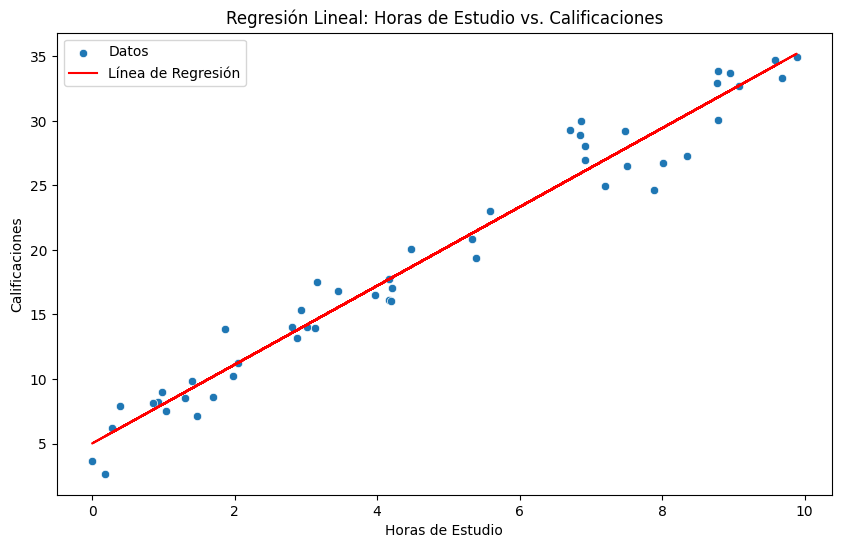

(                  Horas de Estudio  Calificaciones
 Horas de Estudio          1.000000        0.981691
 Calificaciones            0.981691        1.000000,
 0.9637179123308933)

In [ ]:
# Para ilustrar regresión y correlación, usaremos un conjunto de datos ficticios que representan
# las horas de estudio (variable independiente) y las calificaciones obtenidas (variable dependiente).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Generamos datos ficticios
np.random.seed(1)  # Para garantizar la reproducibilidad
horas_estudio = np.random.uniform(0, 10, 50)  # Horas de estudio varían de 0 a 10
calificaciones = 5 + horas_estudio * 3 + np.random.normal(0, 2, 50)  # Calificación basada en horas de estudio más ruido

# Creamos un DataFrame con pandas
datos = pd.DataFrame({
    'Horas de Estudio': horas_estudio,
    'Calificaciones': calificaciones
})

# Calculamos la correlación
coef_correlacion = datos.corr()

# Realizamos una regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(horas_estudio, calificaciones)

# Predecimos calificaciones usando la regresión lineal para graficar
calificaciones_predichas = intercept + slope * horas_estudio

# Graficamos los datos junto con la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas de Estudio', y='Calificaciones', data=datos, label='Datos')
plt.plot(horas_estudio, calificaciones_predichas, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Horas de Estudio vs. Calificaciones')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.legend()
plt.show()

(coef_correlacion, r_value**2)
